# Predicting Heart disease using machine learning
This notebook tries to predict heart disease using Machine Learning algorithm based on their medical attributes. 

The approach is as follows:
1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modelling

## 1. Problem definition

In as statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleaveland database UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/heart+disease

Other version availale in kaggel:
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

>If we can reach 95% accuracy at predicting whether or not patient has heart disease during proof of concept.

## 4. Features

**Create data dictionary**
 1. age - age in years,
 2. sex - (1 = male; 0 = female),
 3. cp - chest pain type",
    * 0: Typical angina: chest pain related decrease blood supply to the heart,
    * 1: Atypical angina: chest pain not related to heart",
    * 2: Non-anginal pain: typically esophageal spasms (non heart related),
    * 3: Asymptomatic: chest pain not showing signs of disease",
 4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern\n",
 5. chol - serum cholestoral in mg/dl,
    * serum = LDL + HDL + .2 * triglycerides,
    * above 200 is cause for concern\n",
 6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
    * '>126' mg/dL signals diabetes,
 7. restecg - resting electrocardiographic results,
    * 0: Nothing to note,
    * 1: ST-T Wave abnormality,
       * can range from mild symptoms to severe problems,
       * signals non-normal heart beat,
    * 2: Possible or definite left ventricular hypertrophy,
       * Enlarged heart's main pumping chamber,
 8. thalach - maximum heart rate achieved,
 9. exang - exercise induced angina (1 = yes; 0 = no),
 10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more,
 11. slope - the slope of the peak exercise ST segment,
       * 0: Upsloping: better heart rate with excercise (uncommon),
       * 1: Flatsloping: minimal change (typical healthy heart),
       * 2: Downslopins: signs of unhealthy heart,
 12. ca - number of major vessels (0-3) colored by flourosopy,
       * colored vessel means the doctor can see the blood passing through,
       * the more blood movement the better (no clots),
 13. thal - thalium stress result,
       * 1,3: normal,
       * 6: fixed defect: used to be defect but ok now,
       * 7: reversable defect: no proper blood movement when excercising,
 14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


### Preparing the tools
We are going to use pandas, Matplotlib, and Numpy for data analysis and manipulation

In [5]:
# Import all tool that we need
# Regular EDA and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 


# Models fromm Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [9]:
df = pd.read_csv('data/heart.csv')

In [12]:
df.shape #(rows, columns)

(303, 14)

## Data Exploration (EDA)

The goal here is to find out more about the data and to become subject matter expert on the dataset

1. What question(s) are you trying to solve? 
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add/ change or remove to get more out of your data?

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

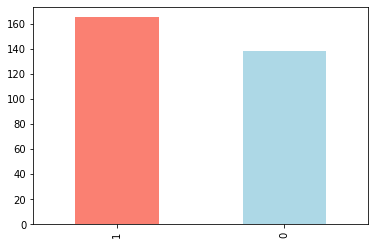

In [19]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
#Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Heart disease frequency according to sex

In [25]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [26]:
# compare target column with sex column using the function pd.crosstab(data)
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


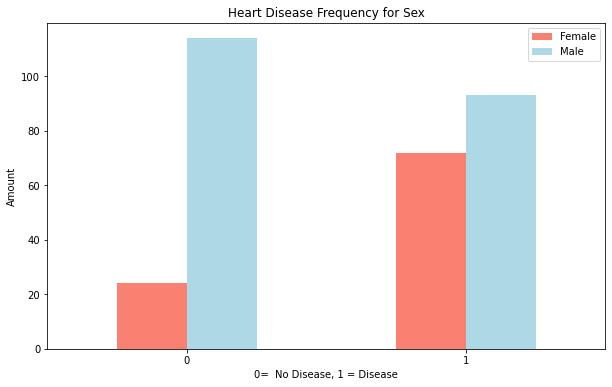

In [35]:
#create a plot of crosstab
pd.crosstab(df['target'], df['sex']).plot(kind = 'bar',
                                          figsize = (10,6),
                                          color = (['salmon', 'lightblue']))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0=  No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart rate for Heart Disease

In [38]:
df['age'][df['target'] ==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

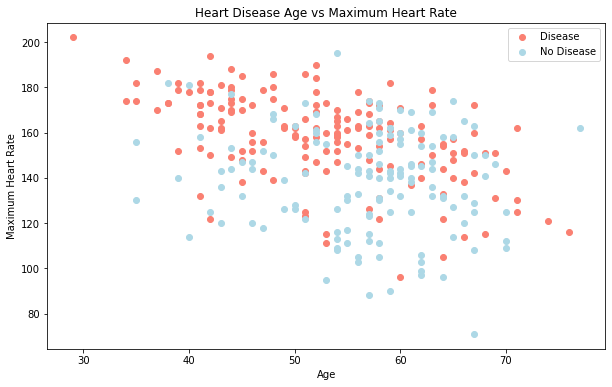

In [45]:
# Create another figure
plt.figure(figsize = (10,6))

#Scatter with positive examples (target = 1)
plt.scatter(df['age'][df['target'] ==1],
           df['thalach'][df['target']==1],
           color = 'salmon')
# Scatter with negative examples (target = 0)
plt.scatter(df['age'][df['target'] == 0],
           df['thalach'][df['target']== 0],
           color = 'lightblue')

plt.title('Heart Disease Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Disease', 'No Disease']);

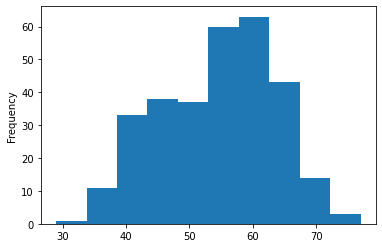

In [47]:
# Check the distribution age with histogram
df['age'].plot.hist();

### Heart diesease frequency per Chest Pain Type

3. cp - chest pain type",
    * 0: Typical angina: chest pain related decrease blood supply to the heart,
    * 1: Atypical angina: chest pain not related to heart",
    * 2: Non-anginal pain: typically esophageal spasms (non heart related),
    * 3: Asymptomatic: chest pain not showing signs of disease",

In [48]:
#Check chest pain type against target 
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


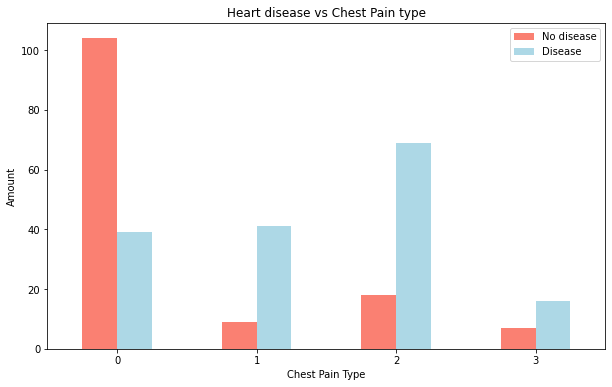

In [51]:
pd.crosstab(df['cp'],df['target']).plot(kind = 'bar',
                                        figsize = (10, 6),
                                        color = ['salmon', 'lightblue'])

#Add labels
plt.title('Heart disease vs Chest Pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation = 0);

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
# Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


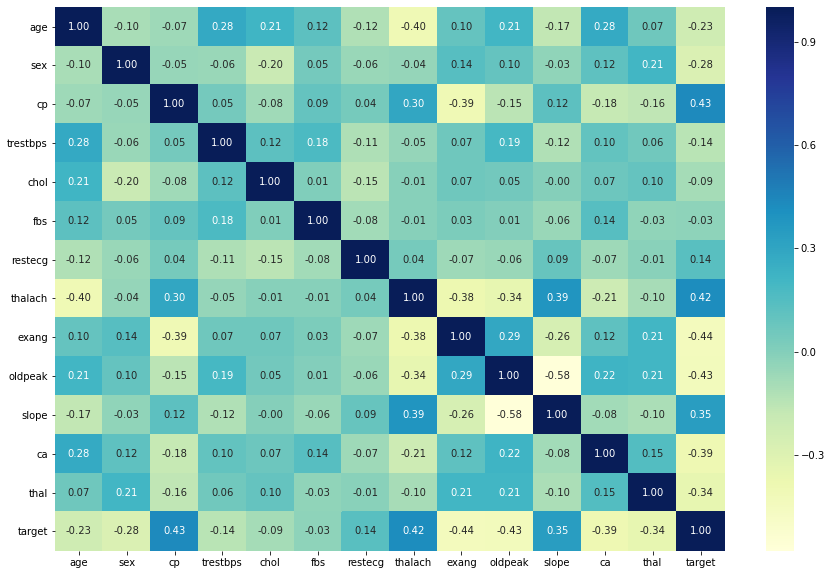

In [58]:
# Make the above correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

# buttom, top = ax.get_ylim()
# ax.set_ylim(buttom + 0.5, top - 0.5)

#the syntax above is used if there is a misaligment of first and last row cutoff in heatmap seaborn

## 5. Modelling

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
# Split the data into x and y
X = df.drop('target', axis = 1)
y = df['target']

In [61]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [62]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [63]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2)


In [64]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [65]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we have split our data into train and test sets, it is time to build a machine learning model. 

We will train in on the train set (to find patterns)

We will test in on the test set (use the patterns)

Three machine learning models will be used:
1. Logistics Regression
2. K-Nearest Neighbor Classifier
3. Random Forest Classifier

In [73]:
# Put models in dictionary form
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    Models: a dictionary of different Scikit-learn machine learning models
    X_train : training data
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to the model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [75]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

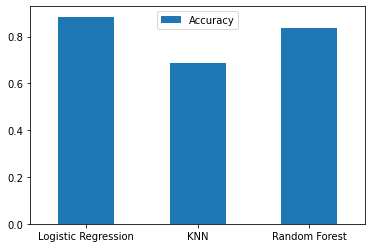

In [81]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare.transpose().plot.bar()
plt.xticks(rotation = 0);

Now we have a baseline models but the model's first prediction aren't always what we should based our next steps off. What's next?

Let's look at the following:
* Hyperparameter tuning 
* Feature importance
* Confusion matrix
* Cross Validation
* Precision
* Recall
* F1- Score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by Hand)


In [87]:
#let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit the algorithm
    knn.fit(X_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update test_scores list
    test_scores.append(knn.score(X_test,y_test))
    

In [94]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [91]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


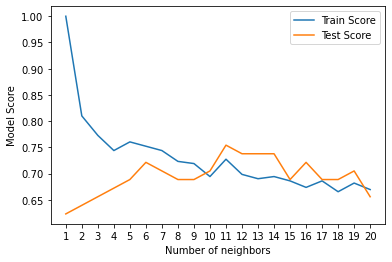

In [97]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [106]:
# Create Hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

Now we have hyperparameter grids for to setup each of our models, let's tune them using RandomizedSearchCV

In [103]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
# Fit random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [104]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [105]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned LogisticRegression let's do the same for RandomForestClassifier

In [107]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose =  True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   54.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [108]:
# Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [109]:
# Evaluate the randomizedsearchCV RandomForestClassifier model
rs_rf.score(X_test, y_test)


0.8688524590163934

In [110]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Different ways to Hyperparameter tuning
1. By Hand
2. RandomizedSearchCV
3. GridSearchCV

### Hyperparameter tuning using GridSearchCV
Since the LogisticRegression model is the best score so far, we will try to improve it using GridSearchCV.

In [111]:
# Different hyperparameter for LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4,30),
               'solver': ['liblinear']}

# Setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit our grid hyperparameter model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [112]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [113]:
# Evaluate GridSearchCV LogisticRegression Model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [114]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluate tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC curver
* Confusion matrix
* Classification matrix
* Precision
* Recall
* F1- score

and it would be great if cross validation is used where possible.

To make comparisons and evaluate how trained model, first, we need to make predictions.

In [115]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [116]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [117]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

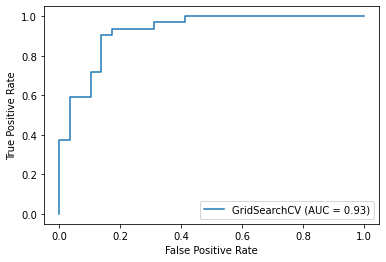

In [119]:
# Plot ROC curve  and calculate AUC metric 
plot_roc_curve(gs_log_reg, X_test, y_test);

In [120]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


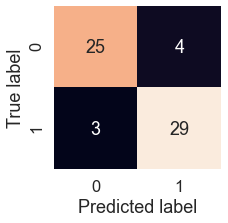

In [123]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    #buttom, top = ax.get_y_lim()
    #ax.set_ylim(buttom + 0.5, top-0.5)   # this function is used only if the numbering in the heatmap is cut off
    
plot_conf_mat(y_test, y_preds)

Now that we have ROC curve, an AUC metric and a confuction matrix, let's get a classification report, as well as cross validated precision, recall, and f1-score.

In [124]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using  cross-validation
We are going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we will be using cross_val_score().

In [125]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [126]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

In [127]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [128]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [130]:
# cross validation precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv = 5,
                              scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [131]:
# cross validation recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv = 5,
                              scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [132]:
# cross validation f1-score
cv_f1 = cross_val_score(clf,
                              X,
                              y,
                              cv = 5,
                              scoring = 'f1')
cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

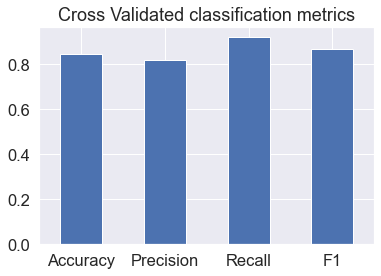

In [136]:
# Visualized cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                         index = [0])
cv_metrics.transpose().plot.bar(title = 'Cross Validated classification metrics',
                               legend = False)
plt.xticks(rotation = 0);

### Feature Importance

Feature importance is technique to give each feature scores to the target variable (which feature contributed the most to the outcomes of the target variable/feature.) Feature importance is different for each machine learning model. One can research for 'model name' feature importance 

In [137]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [143]:
# Check for coefficient for each feature
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [139]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [142]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [155]:
clf.coef_[0]

array([ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
        0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
        0.45051628, -0.63609897, -0.67663373])

In [164]:
combine = zip(df.columns, clf.coef_[0])
print(combine)

In [165]:
dict(combine) 

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [166]:
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

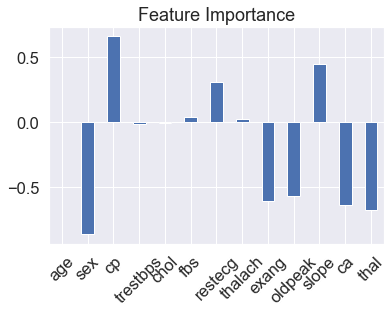

In [178]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.transpose().plot.bar(title = 'Feature Importance', legend = False)
plt.xticks(rotation = 45)

In [179]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [180]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment,
* 0: Upsloping: better heart rate with excercise (uncommon),
* 1: Flatsloping: minimal change (typical healthy heart),
* 2: Downslopins: signs of unhealthy heart,

This notebook is part of online learning Udemy zero to mastery ML